In [32]:
# Question one:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [35]:
R = A.append(B)
print(R)

None


In [36]:
r = A.extend(B)
print(r)

None


In [45]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
# Question two
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [44]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
# Read in the data
fuel_data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

In [11]:
# Checking for first five rows of the data
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [13]:
# Question 3
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values(ascending = False)

fuel_type_code_pudl
nuclear    4955.157002
oil         168.877086
coal         67.421830
waste        19.518122
other        18.253856
gas          13.659397
Name: fuel_cost_per_unit_burned, dtype: float64

In [14]:
# Question 4
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [29]:
# Number of rows and columns
fuel_data.shape

(29523, 11)

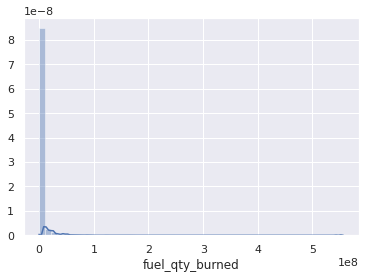

In [15]:
# The visual below shows that the data is rightly skewed
sns.distplot(fuel_data['fuel_qty_burned'])

In [16]:
# Question 5
# Calculating the amount of skewness
fuel_data.fuel_qty_burned.skew(axis = 0)

15.851495469109503

In [17]:
# Calculating the amount of kurtosis
fuel_data.fuel_qty_burned.kurt(axis = 0)

651.3694501337732

In [18]:
# Question 6
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [19]:
# Question 7
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [20]:
# Filling up missing values with the most occuring value
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna(fuel_data['fuel_unit'].mode()[0])

In [21]:
# Confirming if it has been filled
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [31]:
#percentage of missing rows
percent = (180/ 29523) * 100
percent

0.609694136774718

In [22]:
# Question 9
coal_columns = fuel_data.loc[fuel_data['fuel_type_code_pudl'] == 'coal']
coal_columns

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.59000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.59200,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.13000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.95000,47.210,45.990,1.970
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.92200,44.240,43.250,1.850
...,...,...,...,...,...,...,...,...,...,...,...
29503,f1_fuel_2018_12_191_1_14,191,2018,lawrence,coal,ton,1761218.0,17.88832,26.775,27.392,1.497
29510,f1_fuel_2018_12_403_0_2,403,2018,wygen 2,coal,ton,569800.0,16.11000,14.760,0.810,1.130
29516,f1_fuel_2018_12_12_0_8,12,2018,neil simpson unit 2,coal,ton,491913.0,16.10000,14.760,17.720,1.100
29517,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.06800,13.690,14.310,0.890


In [23]:
new = coal_columns.loc[coal_columns['report_year'].isin(['1994', '1998'])]

In [24]:
new.groupby('report_year')['fuel_cost_per_unit_burned'].sum().pct_change()

report_year
1994         NaN
1998   -0.205677
Name: fuel_cost_per_unit_burned, dtype: float64

In [25]:
# Question 10
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending = False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

In [26]:
# Question 8
def correlation(col):
  if fuel_data[col].dtype == 'float64':
    return (fuel_data[col]).corr(fuel_data['fuel_cost_per_unit_burned'])

In [27]:
for col in fuel_data.columns:
  print('{}: {}'.format(col, correlation(col)))

record_id: None
utility_id_ferc1: None
report_year: None
plant_name_ferc1: None
fuel_type_code_pudl: None
fuel_unit: None
fuel_qty_burned: -0.018535416794825225
fuel_mmbtu_per_unit: -0.010033808428853071
fuel_cost_per_unit_burned: 1.0
fuel_cost_per_unit_delivered: 0.01100740329916511
fuel_cost_per_mmbtu: -0.00043721044397040026
